In [47]:
import numpy as np
import scipy as sp

date = '2024-02-09'
scans = np.array([696, 703 , 704])
#scans = np.array([89])
scan=scans[0]

fichier = f"/media/pucemanip/manip/data/{date}/scan{str(scan).zfill(3)}/scan{str(scan).zfill(3)}data001.mat"
#fichier = f"/home/isabellebouchoule/Puce/analysedata/{date}/scan{str(scan).zfill(3)}/scan{str(scan).zfill(3)}data001.mat"
lesparams = sp.io.loadmat(fichier)['gusparam'][0]
lesparams = sorted([lesparams[2*i][0] for i in range(int(len(lesparams)/2))])
print(lesparams)
param_names = ["DeadtimeDMD" ,"Width1_bis" ]  # List of parameter names
for param in param_names :
    if  param not in lesparams : print( f"{param} not in lesparams" )

[np.str_('ACAmplitudeRFdebut'), np.str_('ACDCBxfive'), np.str_('ACDCByfive'), np.str_('ACDCZbiasthree'), np.str_('AmpitudeRFfinexp'), np.str_('AmplitudeRFfinal'), np.str_('AmplitudeRFinit'), np.str_('BUMotz'), np.str_('BiasUmot'), np.str_('BxImg'), np.str_('BxMOT'), np.str_('BxMolasses'), np.str_('Bxdisp'), np.str_('Bxpumping'), np.str_('ByACtrap'), np.str_('ByMOT'), np.str_('ByMolasses'), np.str_('Bydisp'), np.str_('Bypumping'), np.str_('BzImg'), np.str_('BzMOT'), np.str_('BzMolasses'), np.str_('BzZtrap'), np.str_('Bzdisp'), np.str_('Bzpumping'), np.str_('DcourantAC'), np.str_('DcurrentACDC1'), np.str_('DcurrentACDC2'), np.str_('DcurrentACDC3'), np.str_('DcurrentEnd'), np.str_('DeadtimeDMD'), np.str_('DeadtimeDMD_bis'), np.str_('DelaichampZtrap'), np.str_('DelayTriger'), np.str_('Device_angle'), np.str_('Device_angle_1'), np.str_('DprimeACDC1'), np.str_('DprimeACDC2'), np.str_('DprimecourantAC'), np.str_('EndRotationtime'), np.str_('FreqCompress'), np.str_('FreqIni'), np.str_('GradBz'

In [48]:
#Insitut 

date = '2024-02-09'
scans = np.array([703])
param_names = ["DeadtimeDMD" ]  # List of parameter names
for param in param_names :
    if  param not in lesparams : print( f"{param} not in lesparams" )

Version de Python: 3.10.12

Isat= 16.635141621871774

 ['scan703data001.mat', 'scan703data002.mat', 'scan703data003.mat', 'scan703data004.mat', 'scan703data005.mat', 'scan703data006.mat', 'scan703data007.mat', 'scan703data008.mat', 'scan703data009.mat', 'scan703data010.mat', 'scan703data011.mat', 'scan703data012.mat', 'scan703data013.mat', 'scan703data014.mat', 'scan703data015.mat', 'scan703data016.mat', 'scan703data017.mat']
/home/isabelle.bouchoule/Puce/analysedata/2024-02-09/scan703/
Sélection des atomes : [ [ 10 140] [850 175] ]
Sélection du background : [ [550 175] [650 185] ]

Gain CCD: 0.9113504556752279
18
_______________________________
_______________________________
Nom parametre : DeadtimeDMD : [np.uint8(18)]
CPU times: user 21 µs, sys: 2 µs, total: 23 µs
Wall time: 27.2 µs
-----
----
-----
----
offset =  595
(18.0,) ['/media/pucemanip/manip/data/2024-02-09/scan703/scan703data001.mat', '/media/pucemanip/manip/data/2024-02-09/scan703/scan703data002.mat', '/media/pucemanip/ma

<Figure size 432x288 with 0 Axes>

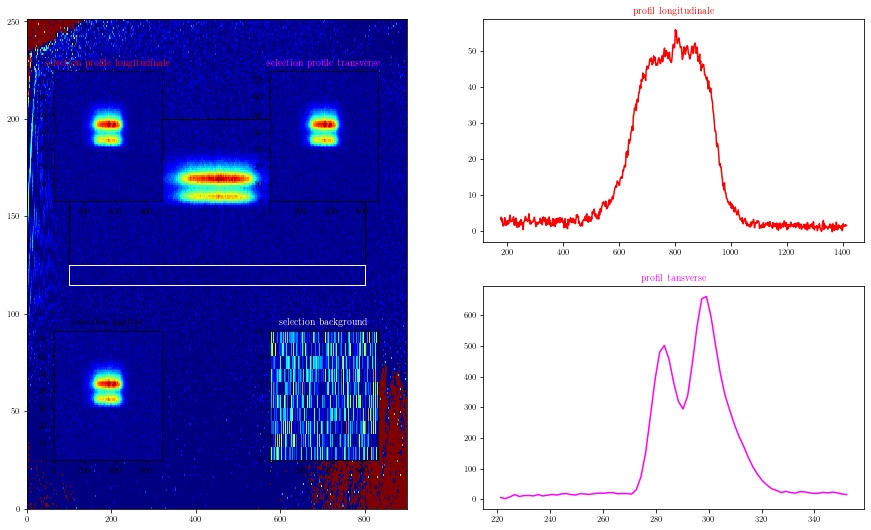

N ph ,  13274.92416886209


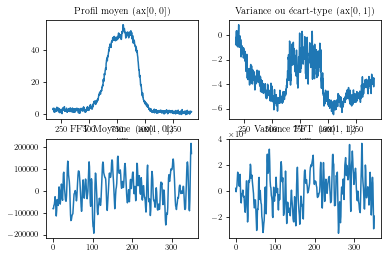

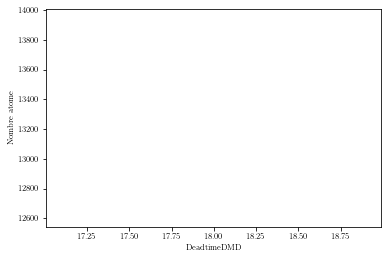

2024-02-09/Y_1D_Scan_696_DeadtimeDMD-18.0_.txt


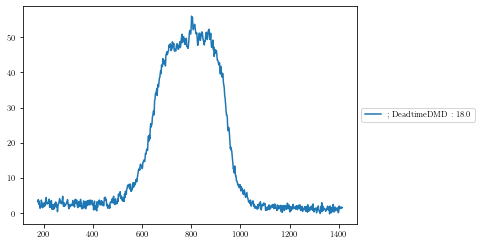

la
la 1
la 2
la 3
CPU times: user 151 µs, sys: 9 µs, total: 160 µs
Wall time: 146 µs


In [49]:
%run Import_donnees_n_parametres.ipynb

1


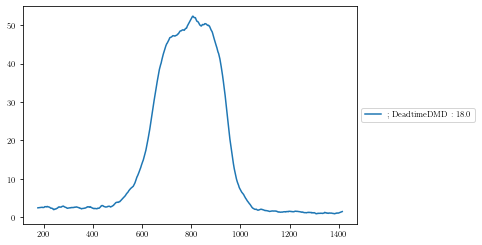

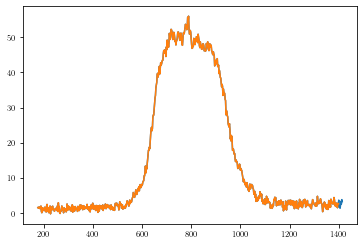

[100.         172.92496092 796.65686921   1.90794166]


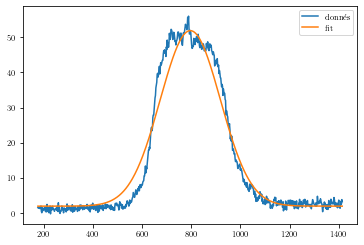

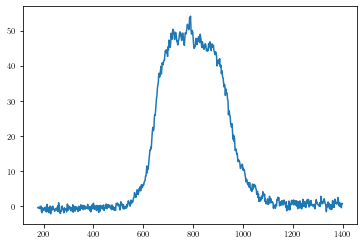

[1.00000000e+02 1.72923489e+02 7.96657178e+02 1.06738027e-04]


[]

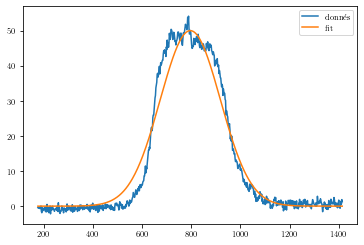

In [50]:
import scipy.signal as signal
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
X , Y , label = PROFILS[0]
print( len(PROFILS))
plt.plot(X,signal.savgol_filter(Y,20 , 1 ) , label = label )

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

x , y = np.flip(X) , Y

plt.plot(x,y , label = label )
#plt.show()

def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(np.exp(-(x-x0)**2/sigma**2)) + b 

mask = (x > 0)*(x < 1400) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 


plt.plot(x[mask],y[mask] , label = label )
plt.show()
p0 = [ 100 , 1000 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 0 , - 5  ],[100 , 1000 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

X_profil_insitut , Y_profil_insitut , label_insitut = x , y -b , label 


x , y = X_profil_insitut , Y_profil_insitut

plt.plot(x[mask],y[mask] , label = label )
plt.show()

p0 = [ 100 , 1000 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 2000 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.plot()

In [53]:
#Deformation 

scans = np.array([704])
param_names = ["DeadtimeDMD" ]  # List of parameter names
for param in param_names :
    if  param not in lesparams : print( f"{param} not in lesparams" )

Version de Python: 3.10.12

Isat= 16.635141621871774

 ['scan704data001.mat', 'scan704data002.mat', 'scan704data003.mat', 'scan704data004.mat', 'scan704data005.mat', 'scan704data006.mat', 'scan704data007.mat', 'scan704data008.mat', 'scan704data009.mat', 'scan704data010.mat', 'scan704data011.mat', 'scan704data012.mat', 'scan704data013.mat', 'scan704data014.mat', 'scan704data015.mat', 'scan704data016.mat', 'scan704data017.mat', 'scan704data018.mat', 'scan704data019.mat', 'scan704data020.mat', 'scan704data021.mat', 'scan704data022.mat', 'scan704data023.mat', 'scan704data024.mat', 'scan704data025.mat', 'scan704data026.mat', 'scan704data027.mat', 'scan704data028.mat', 'scan704data029.mat', 'scan704data030.mat', 'scan704data031.mat', 'scan704data032.mat', 'scan704data033.mat', 'scan704data034.mat', 'scan704data035.mat', 'scan704data036.mat', 'scan704data037.mat', 'scan704data038.mat', 'scan704data039.mat']
/home/isabelle.bouchoule/Puce/analysedata/2024-02-09/scan704/
Sélection des atomes : [

<Figure size 432x288 with 0 Axes>

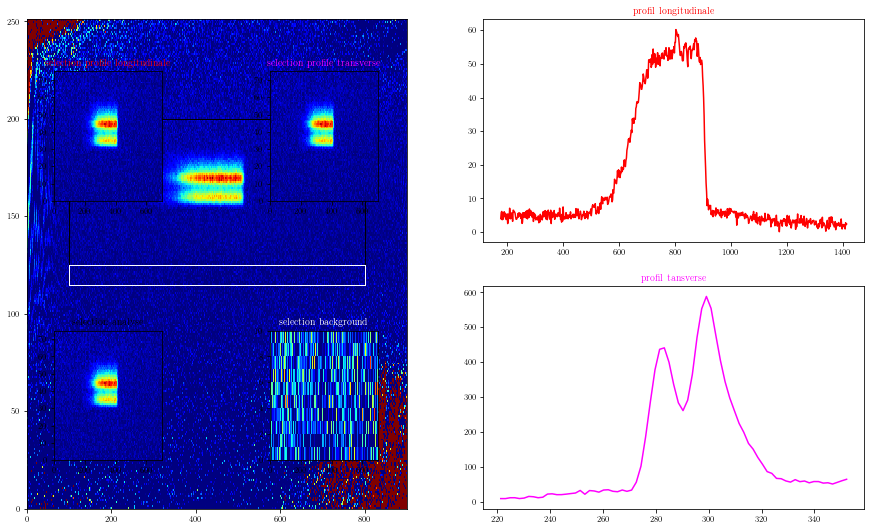

N ph ,  13999.453153075385


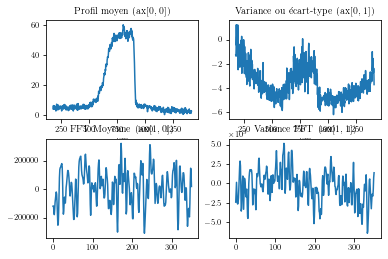

(18.0,) ['/media/pucemanip/manip/data/2024-02-09/scan704/scan704data002.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data003.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data004.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data005.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data007.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data008.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data009.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data010.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data012.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data013.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data014.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data015.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data017.mat', '/media/pucemanip/manip/data/2024-02-09/scan704/scan704data018.mat', '/media/pucemanip/manip/d

<Figure size 432x288 with 0 Axes>

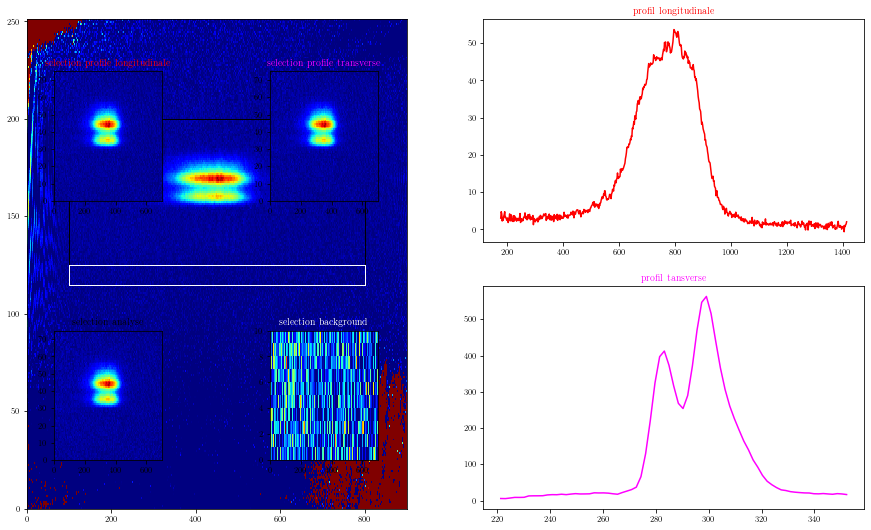

N ph ,  11743.650105995606


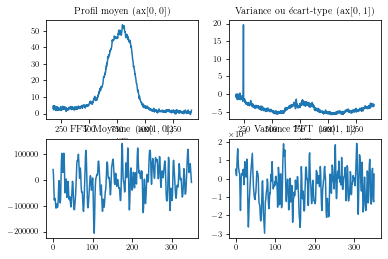

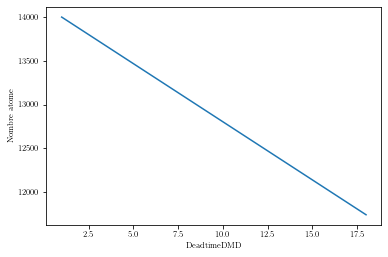

2024-02-09/Y_1D_Scan_696_DeadtimeDMD-1.0_.txt
2024-02-09/Y_1D_Scan_696_DeadtimeDMD-18.0_.txt


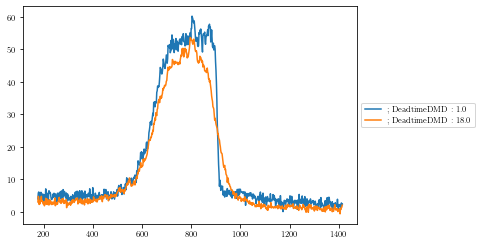

la
la 1
la 2
la 3
CPU times: user 127 µs, sys: 11 µs, total: 138 µs
Wall time: 149 µs


In [54]:
%run Import_donnees_n_parametres.ipynb

2


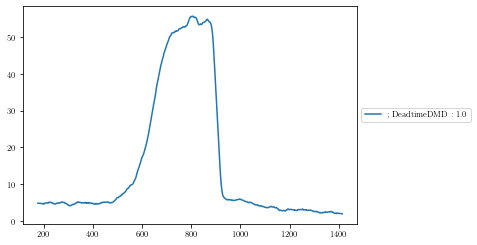

[  17.17919799 1000.          948.23574324   -2.85386224]


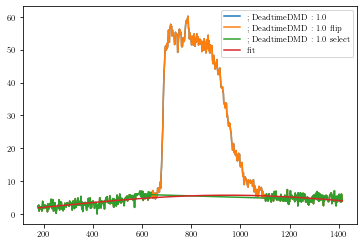

finir


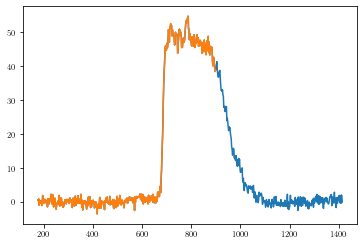

[4.72322872e+01 9.04302513e+00 6.84926961e+02 1.23409551e-01]


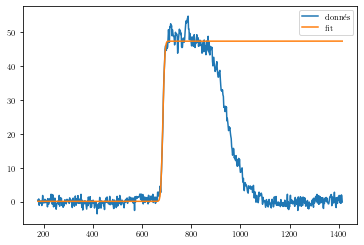

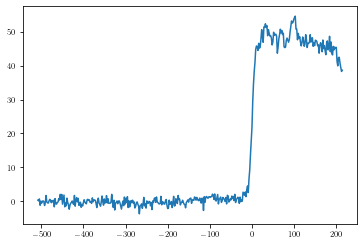

[ 50.   1. 650.   5.]


[]

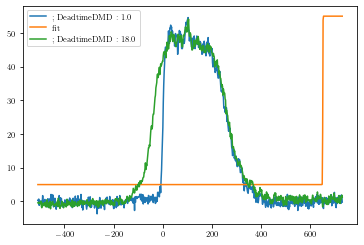

In [55]:
X , Y , label = PROFILS[0]
print( len(PROFILS))
plt.plot(X,signal.savgol_filter(Y,20 , 1 ) , label = label )

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

x , y = np.flip(X) , Y
plt.plot(x,y , label = label )
#plt.show()

plt.plot( x  , y  , label = label + " flip")
def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(np.exp(-(x-x0)**2/sigma**2)) + b 

mask = (x > 1100)+(x < 640) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 
plt.plot(x[mask],y[mask] , label = label + ' select' )
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 0 , - 5  ],[100 , 1000 , 1000 , 5 ])
                           )
print(popt)
A , sigma , x0 , b = popt 

plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

print("finir")
y -= model(x , *popt)
plt.plot(x,y , label = label )

def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(special.erf((x-x0)/sigma)+1) + b 

mask = (x > 0)*(x < 900) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 


plt.plot(x[mask],y[mask] , label = label )
plt.show()
p0 = [ 50 , 1 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([40, 0 , 400 , - 5  ],[60 , 10 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x00 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

X_profil_coupure_1_1 , Y_profil_coupure_1_1 , label_coupure_1_1 = x - x00 , y -b , label 
X_profil_insitut -= x00

x , y = X_profil_coupure_1_1 , Y_profil_coupure_1_1

plt.plot(x[mask],y[mask] , label = label )
plt.show()



popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 2000 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( X_profil_coupure_1_1 , Y_profil_coupure_1_1  , label = label_coupure_1_1)
plt.plot(  X_profil_coupure_1_1 , model( X_profil_coupure_1_1 , *popt) , label = "fit")
plt.plot( X_profil_insitut , Y_profil_insitut , label = label_insitut ) 
plt.legend()
plt.plot()



2


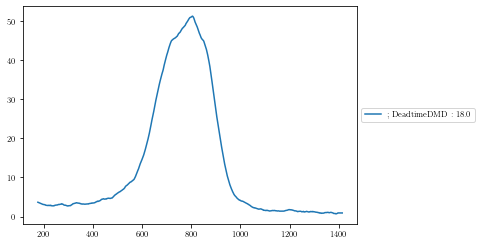

[7.21703874e+00 5.77261296e+02 1.00000000e+03 3.05263331e-01]


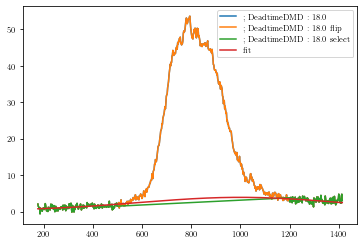

finir


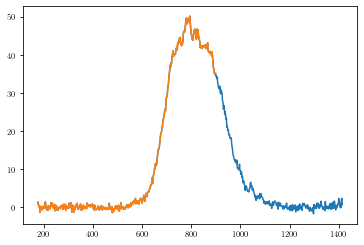

[4.36433733e+01 5.28664436e+01 6.82217983e+02 1.57362027e-01]


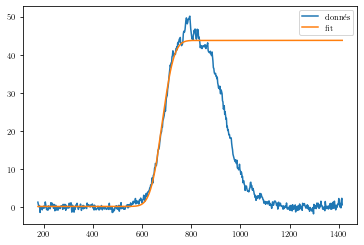

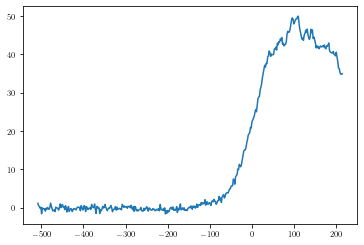

[ 4.36433896e+01  5.28666135e+01 -2.70890236e+00 -3.35186256e-07]


[]

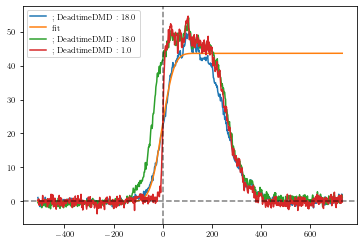

In [56]:
X , Y , label = PROFILS[1]
print( len(PROFILS))
plt.plot(X,signal.savgol_filter(Y,20 , 1 ) , label = label )

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

x , y = np.flip(X) , Y
plt.plot(x,y , label = label )
#plt.show()

plt.plot( x  , y  , label = label + " flip")
def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(np.exp(-(x-x0)**2/sigma**2)) + b 

mask = (x > 1200)+(x < 500) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 
plt.plot(x[mask],y[mask] , label = label + ' select' )
p0 = [ 10 , 1000 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 0 , - 5  ],[100 , 10000000 , 1000 , 5 ])
                           )
print(popt)
A , sigma , x0 , b = popt 

plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

print("finir")

y -= model(x , *popt)
plt.plot(x,y , label = label )

def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(special.erf((x-x0)/sigma)+1) + b 

mask = (x > 0)*(x < 900) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 


plt.plot(x[mask],y[mask] , label = label )
plt.show()
p0 = [ 50 , 1 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([40, 0 , 400 , - 5  ],[60 , 100 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

X_profil_coupure_1_18 , Y_profil_coupure_1_18 , label_coupure_1_18 = x - x00 , y -b , label 


x , y = X_profil_coupure_1_18 , Y_profil_coupure_1_18

plt.plot(x[mask],y[mask] , label = label )
plt.show()




p0 = [ 100 , 1000 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 2000 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( X_profil_coupure_1_18  , Y_profil_coupure_1_18  , label = label_coupure_1_18)
plt.plot( X_profil_coupure_1_18 , model(X_profil_coupure_1_18 , *popt) , label = "fit")
plt.plot( X_profil_insitut , Y_profil_insitut , label = label_insitut ) 
plt.plot( X_profil_coupure_1_1 , Y_profil_coupure_1_1 , label = label_coupure_1_1 ) 
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.plot()



In [57]:
#Expansion 

date = '2024-02-09'
scans = np.array([696])
scan=scans[0]
fichier = f"/media/pucemanip/manip/data/{date}/scan{str(scan).zfill(3)}/scan{str(scan).zfill(3)}data001.mat"
#fichier = f"/home/isabellebouchoule/Puce/analysedata/{date}/scan{str(scan).zfill(3)}/scan{str(scan).zfill(3)}data001.mat"
lesparams = sp.io.loadmat(fichier)['gusparam'][0]
lesparams = sorted([lesparams[2*i][0] for i in range(int(len(lesparams)/2))])
print(lesparams)
param_names = ["DeadtimeDMD_bis" , "Width1_bis" ]  # List of parameter names
for param in param_names :
    if  param not in lesparams : print( f"{param} not in lesparams" )

[np.str_('ACAmplitudeRFdebut'), np.str_('ACDCBxfive'), np.str_('ACDCByfive'), np.str_('ACDCZbiasthree'), np.str_('AmpitudeRFfinexp'), np.str_('AmplitudeRFfinal'), np.str_('AmplitudeRFinit'), np.str_('BUMotz'), np.str_('BiasUmot'), np.str_('BxImg'), np.str_('BxMOT'), np.str_('BxMolasses'), np.str_('Bxdisp'), np.str_('Bxpumping'), np.str_('ByACtrap'), np.str_('ByMOT'), np.str_('ByMolasses'), np.str_('Bydisp'), np.str_('Bypumping'), np.str_('BzImg'), np.str_('BzMOT'), np.str_('BzMolasses'), np.str_('BzZtrap'), np.str_('Bzdisp'), np.str_('Bzpumping'), np.str_('DcourantAC'), np.str_('DcurrentACDC1'), np.str_('DcurrentACDC2'), np.str_('DcurrentACDC3'), np.str_('DcurrentEnd'), np.str_('DeadtimeDMD'), np.str_('DeadtimeDMD_bis'), np.str_('DelaichampZtrap'), np.str_('DelayTriger'), np.str_('Device_angle'), np.str_('Device_angle_1'), np.str_('DprimeACDC1'), np.str_('DprimeACDC2'), np.str_('DprimecourantAC'), np.str_('EndRotationtime'), np.str_('FreqCompress'), np.str_('FreqIni'), np.str_('GradBz'

Version de Python: 3.10.12

Isat= 16.635141621871774

 ['scan696data001.mat', 'scan696data002.mat', 'scan696data003.mat', 'scan696data004.mat', 'scan696data005.mat', 'scan696data006.mat', 'scan696data007.mat', 'scan696data008.mat', 'scan696data009.mat', 'scan696data010.mat', 'scan696data011.mat', 'scan696data012.mat', 'scan696data013.mat', 'scan696data014.mat', 'scan696data015.mat', 'scan696data016.mat', 'scan696data017.mat', 'scan696data018.mat', 'scan696data019.mat', 'scan696data020.mat', 'scan696data021.mat', 'scan696data022.mat', 'scan696data023.mat', 'scan696data024.mat', 'scan696data025.mat', 'scan696data026.mat', 'scan696data027.mat', 'scan696data028.mat', 'scan696data029.mat', 'scan696data030.mat', 'scan696data031.mat', 'scan696data032.mat', 'scan696data033.mat', 'scan696data034.mat', 'scan696data035.mat', 'scan696data036.mat', 'scan696data037.mat', 'scan696data038.mat', 'scan696data039.mat', 'scan696data040.mat', 'scan696data041.mat', 'scan696data042.mat', 'scan696data043.mat'

<Figure size 432x288 with 0 Axes>

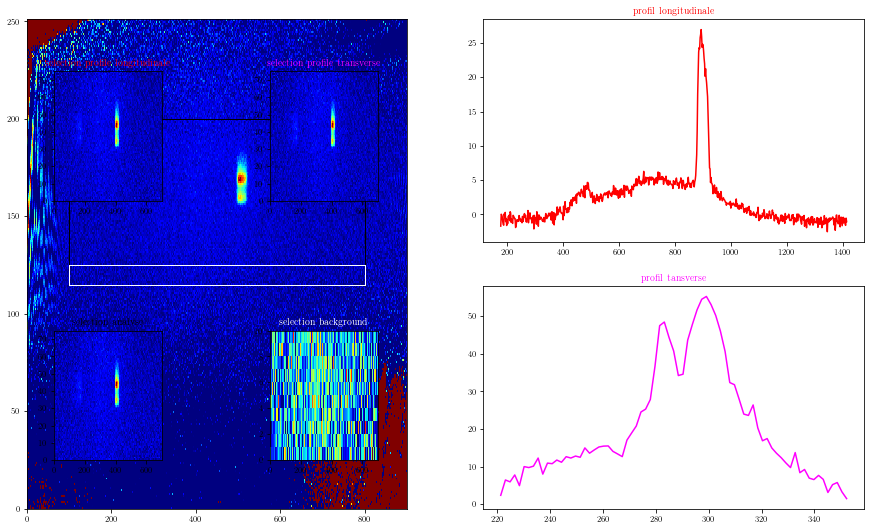

N ph ,  2025.2117503673742


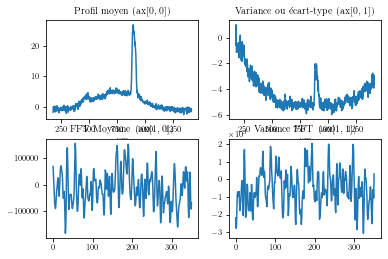

(50.0, 70.0) ['/media/pucemanip/manip/data/2024-02-09/scan696/scan696data002.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data003.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data005.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data007.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data009.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data010.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data012.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data014.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data016.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data017.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data019.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data021.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data023.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data024.mat', '/media/pucemanip/ma

<Figure size 432x288 with 0 Axes>

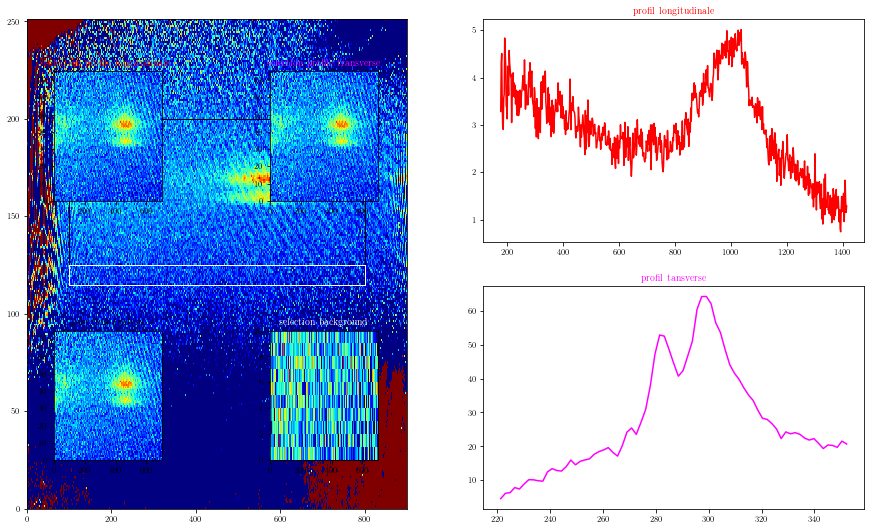

N ph ,  2732.1476550142097


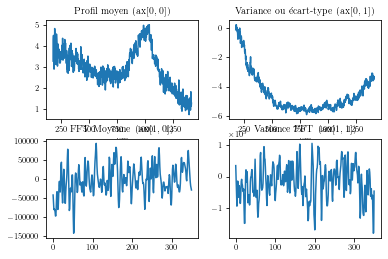

(50.0, 0.0) ['/media/pucemanip/manip/data/2024-02-09/scan696/scan696data004.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data006.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data011.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data013.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data018.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data020.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data025.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data027.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data032.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data034.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data039.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data041.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data046.mat', '/media/pucemanip/manip/data/2024-02-09/scan696/scan696data048.mat', '/media/pucemanip/man

<Figure size 432x288 with 0 Axes>

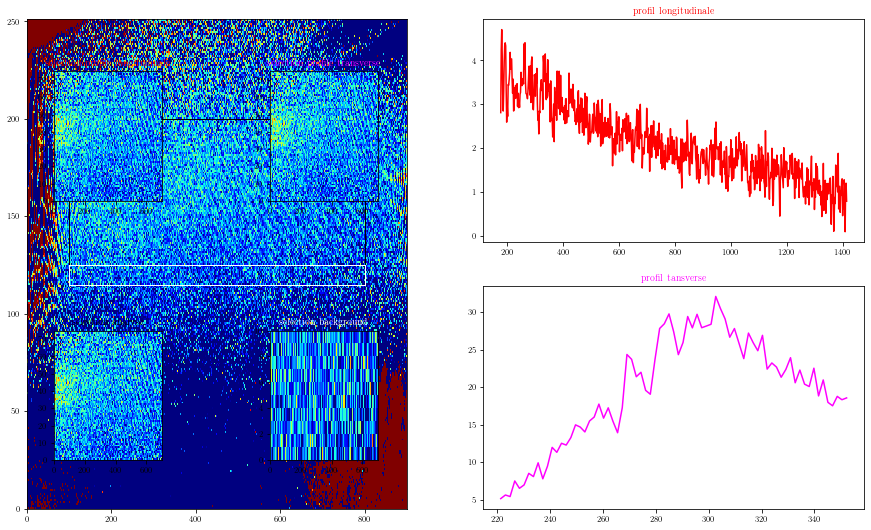

N ph ,  1962.3477299030717


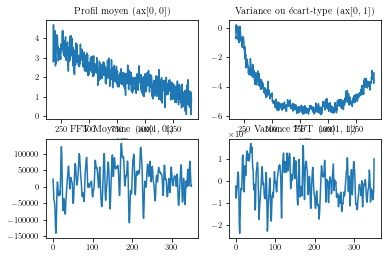

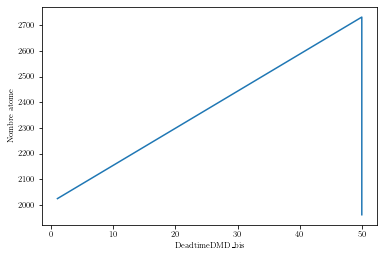

2024-02-09/Y_1D_Scan_696_DeadtimeDMD_bis-1.0_Width1_bis-70.0_.txt
2024-02-09/Y_1D_Scan_696_DeadtimeDMD_bis-50.0_Width1_bis-70.0_.txt
2024-02-09/Y_1D_Scan_696_DeadtimeDMD_bis-50.0_Width1_bis-0.0_.txt


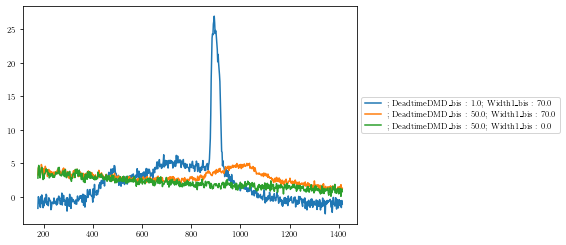

la
la 1
la 2
la 3
CPU times: user 99 µs, sys: 9 µs, total: 108 µs
Wall time: 117 µs


In [58]:
%run Import_donnees_n_parametres.ipynb

3


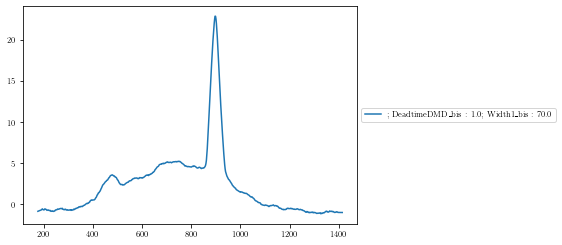

[ 12.0362596  283.83835703 847.80966938  -1.03295239]


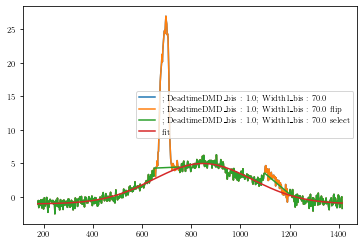

[ 4.47749494e+00  3.78163393e+01  1.12214731e+03 -2.67674413e-02]


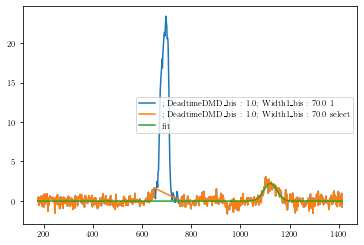

finir


[]

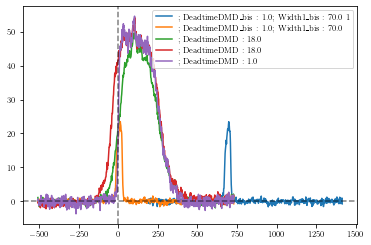

In [59]:
X , Y , label = PROFILS[0]
print( len(PROFILS))
plt.plot(X,signal.savgol_filter(Y,20 , 1 ) , label = label )

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

x , y = np.flip(X) , Y
plt.plot(x,y , label = label )
#plt.show()

plt.plot( x  , y  , label = label + " flip")
def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(np.exp(-(x-x0)**2/sigma**2)) + b 

mask = (x > 1200)+(x < 650) + ((x >750)*(x<1100))
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 
plt.plot(x[mask],y[mask] , label = label + ' select' )

p0 = [ 10 , 10 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 0 , - 5  ],[100 , 1000 , 1000 , 5 ])
                           )
print(popt)
A , sigma , x0 , b = popt 

plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

y -= model(x , *popt)
plt.plot( x  , y  , label = label + " 1")

mask = (x > 750)+(x < 650) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 
plt.plot(x[mask],y[mask] , label = label + ' select' )
p0 = [ 10 , 10 , 1100, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 1000 , - 5  ],[100 , 1000 , 2000 , 5 ])
                           )
print(popt)
A , sigma , x0 , b = popt 

plt.plot( x , model(x , *popt) , label = "fit")

plt.legend()
plt.show()

y -= model(x , *popt)
plt.plot( x  , y  , label = label + " 1")

print("finir")

X_profil_coupure_2_1 , Y_profil_coupure_2_1 , label_coupure_2_1 = x - x00 , y -b , label 

plt.plot( X_profil_coupure_2_1  , Y_profil_coupure_2_1  , label = label_coupure_2_1)
plt.plot( X_profil_coupure_1_18  , Y_profil_coupure_1_18  , label = label_coupure_1_18)
plt.plot( X_profil_insitut , Y_profil_insitut , label = label_insitut ) 
plt.plot( X_profil_coupure_1_1 , Y_profil_coupure_1_1 , label = label_coupure_1_1 ) 
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.plot()



3


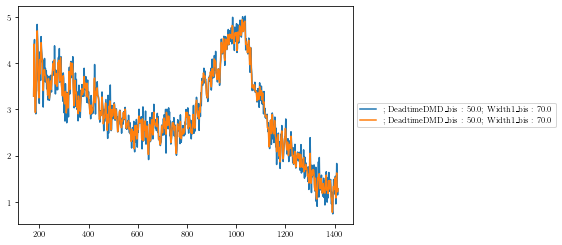

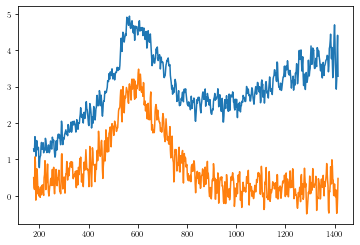

[]

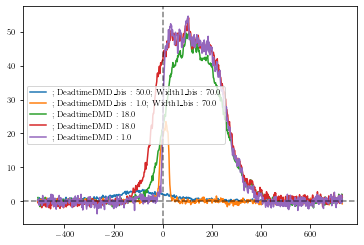

In [60]:
X , Y , label = PROFILS[1]
X0 , Y0 , label0 = PROFILS[2]
plt.plot(X,Y , label = label )
Y = signal.savgol_filter(Y,2 , 1 )
Y0 = signal.savgol_filter(Y0,2 , 1 )
print( len(PROFILS))
plt.plot(X,Y , label = label )

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

x , y = np.flip(X) , Y
x0 , y0 = np.flip(X0) , Y0
plt.plot(x,y , label = label )
plt.plot(x,y-y0 , label = label )
plt.show()
X_profil_coupure_2_50 , Y_profil_coupure_2_50 , label_coupure_2_50 = x -x00 , Y -Y0 , label 
plt.plot( X_profil_coupure_2_50  , Y_profil_coupure_2_50  , label = label_coupure_2_50)
plt.plot( X_profil_coupure_2_1  , Y_profil_coupure_2_1  , label = label_coupure_2_1)
plt.plot( X_profil_coupure_1_18  , Y_profil_coupure_1_18  , label = label_coupure_1_18)
plt.plot( X_profil_insitut , Y_profil_insitut , label = label_insitut ) 
plt.plot( X_profil_coupure_1_1 , Y_profil_coupure_1_1 , label = label_coupure_1_1 ) 
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.plot()



3
2024-02-09/Donnees/X_insitut.txt
3
2024-02-09/Donnees/X_coupure1_1ms.txt
3
2024-02-09/Donnees/X_coupure1_18ms.txt
3
2024-02-09/Donnees/X_coupure2_1ms.txt
3
2024-02-09/Donnees/X_coupure2_50ms.txt


[]

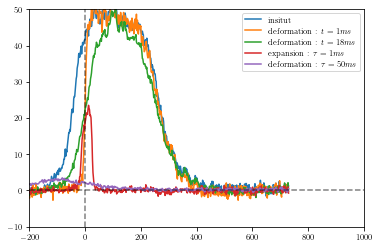

In [61]:
PROFILSS = []
PROFILSS.append([X_profil_insitut , Y_profil_insitut , "insitut"])
PROFILSS.append([X_profil_coupure_1_1 , Y_profil_coupure_1_1 , "deformation : $t = 1ms$"])
PROFILSS.append([X_profil_coupure_1_18 , Y_profil_coupure_1_18 , "deformation : $t = 18ms$"])
PROFILSS.append([X_profil_coupure_2_1 , Y_profil_coupure_2_1 , "expansion : $\\tau = 1ms$"])
PROFILSS.append([X_profil_coupure_2_50 , Y_profil_coupure_2_50 , "deformation : $\\tau = 50ms$"])

import os

new_date = date
if not os.path.isdir(new_date):
    os.mkdir(new_date)
if not os.path.isdir(new_date+'/Donnees/'):
    os.mkdir(new_date+'/Donnees')

nom_x = ["X_insitut","X_coupure1_1ms","X_coupure1_18ms","X_coupure2_1ms","X_coupure2_50ms"]
nom_y = ["Y_insitut","Y_coupure1_1ms","Y_coupure1_18ms","Y_coupure2_1ms" ,"Y_coupure2_50ms"]
 
#print("x0 :", x0)
for i in  range(len(PROFILSS)):

    print(len(PROFILSS[i]))
    X , Y , label = PROFILSS[i]
    
    plt.plot(X,Y , label = label )

    plt.xlim([-200,1000])
    plt.ylim([-10, 50])
  
    print(f"{new_date}/Donnees/{nom_x[i]}.txt")
    np.savetxt(f"{new_date}/Donnees/{nom_x[i]}.txt", X)
    np.savetxt(f"{new_date}/Donnees/{nom_y[i]}.txt", Y)
    
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

plt.legend()
plt.plot()

In [62]:

X1 , Y1 , label1 = PROFILS[10]
plt.plot(X1 , Y1 , label = "donné")
Xf , Yf , labelf = PROFILS[6]
plt.plot(Xf , Yf , label = "fond")
Xffilter1 , Yffilter1 = Xf , signal.savgol_filter(Yf,10 , 3 )
plt.plot(Xffilter1 , Yffilter1, label = "fond  1")

Xffilter11 , Yffilter11 = Xffilter1 , Yffilter1 + 0.12
plt.plot(Xffilter11 , Yffilter11, label = "fond  1.1")


from scipy.interpolate import interp1d
f = interp1d(Xffilter11, Yffilter11, kind='linear', fill_value='extrapolate')
    
mask = Xf > -1000
liste_X = [ 200, 550, 1400]
Xffilter2 , Yffilter2 = Xf , Polynomial(lagrange(liste_X , [f(x) for x in liste_X]).coef[::-1])(Xf) 
plt.plot(Xffilter2 , Yffilter2, label = "fond  2")

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

plt.plot( X1 , Y1 - Yffilter1 , label = "sans fond 1.0 ")
plt.plot( X1 , Y1 - Yffilter11 , label = "sans fond 1.1 ")
plt.plot( X1 , Y1 - Yffilter2 , label = "sans fond 2 ")

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

IndexError: list index out of range

In [ ]:
x0 = 0

X , Y , label = PROFILS[3]
plt.plot(X-x0,Y - Y0  , label = label )
#plt.show()

x , y = np.flip(X-x0) , Y-Y0

plt.plot(x,y , label = label )
#plt.show()

def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(special.erf((x-x0)/sigma)+1) + b 

mask = (x > 0-x0)*(x < 850-x0) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 


plt.plot(x[mask],y[mask] , label = label )
plt.show()
p0 = [ 30 , 1 , 800 , 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 100 , 1000 , 5 ])
                           )
#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

PROFILS[3][1] = PROFILS[3][1] - b 
X , Y , label = PROFILS[3]

x , y = np.flip(X-x0) , Y-Y0

plt.plot(x[mask],y[mask] , label = label )
plt.show()




p0 = [ 30 , 1 , 60 , 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 100 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.plot()

In [ ]:
x0 = 0

X , Y , label = PROFILS[2]
plt.plot(X-x0,Y - Y0  , label = label )
#plt.show()

x , y = np.flip(X-x0) , Y-Y0

plt.plot(x,y , label = label )
#plt.show()

def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(special.erf((x-x0)/sigma)+1) + b 

mask = (x > 0-x0)*(x < 800-x0) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 


plt.plot(x[mask],y[mask] , label = label )
plt.show()
p0 = [ 30 , 1 , 800 , 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 100 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x0 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

PROFILS[2][1] = PROFILS[2][1] - b 
X , Y , label = PROFILS[2]

x , y = np.flip(X-x0) , Y-Y0

plt.plot(x[mask],y[mask] , label = label )
plt.show()




p0 = [ 30 , 1 , 60 , 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 100 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x00 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.plot()

In [ ]:
x00 = 0

X , Y , label = PROFILS[4]
plt.plot(X-x00,Y - Y0  , label = label )
#plt.show()

x , y = np.flip(X-x00) , Y-Y0

plt.plot(x,y , label = label )
#plt.show()

def model(x , A , sigma , x0 , b ):
    
    from scipy import special
    return A/2*(np.exp(-(x-x0)**2/sigma**2)) + b 

mask = (x > 0-x00)*(x < 1400-x00) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 


plt.plot(x[mask],y[mask] , label = label )
plt.show()
p0 = [ 100 , 100 , 650, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 0 , - 5  ],[100 , 1000 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x00 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.show()

PROFILS[4][1] = PROFILS[4][1] - b 
X , Y , label = PROFILS[4]

x , y = np.flip(X-x00) , Y-Y0

plt.plot(x[mask],y[mask] , label = label )
plt.show()




p0 = [ 100 , 100 , 0, 0 ]
popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , - 1000 , - 5  ],[100 , 100 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x00 , b = popt 
plt.plot( x  , y  , label = "donnés")
plt.plot( x , model(x , *popt) , label = "fit")
plt.legend()
plt.plot()

In [ ]:
#x0 = 6.94903402e+02#6.95612617e+02
print("x0 :", x0)

def taille(X,Y):
    
    bord_gauche = X[np.argmax(np.gradient(Y))]
    bord_droite = X[np.argmin(np.gradient(Y))]
    print ("bord_gauche : ", bord_gauche , ' ; bord_droite :' , bord_droite)
    
    print((bord_gauche+bord_droite)/2)
    
    plt.plot(X,Y) 
    plt.plot(X,np.gradient(Y))
    plt.vlines(x=bord_droite, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    plt.vlines(x=bord_gauche, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    #plt.xlim([-50 , 50])
    plt.xlabel('x $(\mu m)$')
    #plt.show()
    
    Taille_exp = bord_droite - bord_gauche 
    print ("Taille bord" , Taille_exp)
    
    print("le nombre d'atome est " , np.sum(Y[Y>0])*pixelsize*1e6)
    



X0 , Y0 , label0 = PROFILS[6]
Y0 = signal.savgol_filter(Y0 ,15 , 3 )+ 1*b

import os

new_date = date
if not os.path.isdir(new_date):
    os.mkdir(new_date)
if not os.path.isdir(new_date+'/Donnees/'):
    os.mkdir(new_date+'/Donnees')
    

liste_ind = [0 , 2 , 3 ,4, 10 ]
nom_x = ["X_insitut","erreur","X_coupure1_1ms","X_coupure1_18ms","X_coupure2_1ms", "erreur","erreur","erreur","erreur","erreur","X_coupure2_30ms"]
nom_y = ["Y_insitut","erreur","Y_coupure1_1ms","Y_coupure1_18ms","Y_coupure2_1ms" ,"erreur","erreur","erreur","erreur","erreur","Y_coupure2_30ms"]
 
print("x0 :", x0)
for i in  liste_ind[1:]:
    X , Y , label = PROFILS[i]
    
    plt.plot(np.flip(X)-x0,Y - Y0  , label = nom_y[i] )#+ ' : ' +label )
    
    x1, y1 = -550, -5
    x2, y2 = 700, 5
    plt.xlim(x1, x2)  # Limite de X de 0 à 10
    plt.ylim(y1,y2)   # Limite de Y de 1 à 8
    #taille(np.flip(X)-x0,Y-Y0)
    # Définir les deux points (x1, y1) et (x2, y2)
    y10 , y20 = 0,0 
    x10 = 0 
    # Tracer la ligne pointillée en utilisant axline avec deux points
    plt.axline((x10, y10), slope=(y20 - y10) / (x2 - x1), color='blue', linestyle='--')
    # Tracer la ligne pointillée en utilisant axline avec deux points
    plt.axvline(x=x10, color='blue', linestyle='--')
  
    print(f"{new_date}/Donnees/{nom_x[i]}.txt")
    np.savetxt(f"{new_date}/Donnees/{nom_x[i]}.txt", np.flip(X)-x0)
    np.savetxt(f"{new_date}/Donnees/{nom_y[i]}.txt", Y-Y0)

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

X , Y , label = PROFILS[10]
plt.plot(np.flip(X)-x0,Y - Y0  , label = label )
np.savetxt(f"{new_date}/Donnees/X_coupure2_30ms.txt", np.flip(X)-x0)
np.savetxt(f"{new_date}/Donnees/Y_coupure2_30ms.txt", Y-Y0)


plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
if date_donnees == '2024-04-24' :
    fichier_x = "X_coupure1_1ms.txt"
    fichier_y = "Y_coupure1_1ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 1~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure1_18ms.txt"
    fichier_y = "Y_coupure1_18ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 28~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_1ms.txt"
    fichier_y = "Y_coupure2_1ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $\\tau = 1~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_30ms.txt"
    fichier_y = "Y_coupure2_30ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $30~ms$']
    DONNEES.append(Donnees)

In [ ]:
liste_ind = [4]
nom_x = ["X_insitut","erreur","X_coupure1_1ms","X_coupure1_18ms","X_coupure2_1ms"]
nom_y = ["Y_insitut","erreur","Y_coupure1_1ms","Y_coupure1_18ms","Y_coupure2_1ms"]

Taille = 24.780000000000086 

for i in  liste_ind[-1:]:
    X , Y , label = PROFILS[i]
    plt.plot((np.flip(X)-x0),Y - Y0  , label = label )
    taille((np.flip(X)-x0),Y)

plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [ ]:
32.01071157123556 - 7.230711571235474

In [ ]:
def polynome(x ,*parameters) :
    y = 0.0 
    for i , p in enumerate(parameters) :
        y += p*np.power(x,i)
    return y 

def polynome2(x ,*parameters) :
    y = 0.0 
    x0 = parameters[0]
    y0 = parameters[1]
    for i , p in enumerate(parameters[2:]) :
        y += p*np.power(x-x0,2*i)
    
    c , b , a = parameters[2:]
    Delta = b**2 - 4*a*c
    racine = [0 , 0 , 0 , 0 ]
    if Delta >= 0 :
        xplus = (-b + np.sqrt(Delta))/(2*a)
        
        xmoins = (-b - np.sqrt(Delta))/(2*a)
        if xmoins >= 0 :
            racine[0] ,racine[1] ,racine[2],  racine[-1] = -np.sqrt(xplus),-np.sqrt(xmoins), np.sqrt(xmoins), np.sqrt(xplus)
        elif xplus>= 0 :
            racine[1] ,racine[2] =  -np.sqrt(xplus), np.sqrt(xplus)
    return np.where((x>racine[1]+x0)*(x<racine[2]+x0), y ,0 )+y0
    return y 

x = np.array([-200 + i for i in range(400)])

plt.plot( x , polynome2(x , *[ 10,10 ,  40,0,-0.000001]))
plt.show()

def cherche (model , x ,y , n , eps ) :#, p0 = np.full ( n , 0.0 ) ):#, bounds=(-1.0e-300, 1.0e-300) ) :
    from scipy.optimize import curve_fit
    yerr = np.full (len(y) , eps ) 
    popt , pcov = curve_fit(model , x , y , sigma = yerr , p0 = np.array([800 ,0 ,  50 , 0 ,- 0.0000001]), 
                            bounds = ([0,-10, 0,-0,-10],[2000,10,  200 , 0.0000001 , 0])
                           )#, bounds=bounds)
    return (popt , pcov )

def chicarre(y,yprim): 
    #print (( y - yprim)**2/yprim)
    #print (filter(lambda x: x != float('-inf'),( y - yprim)**2/yprim))
    
    return sum(filter(lambda x: x != float('inf'),(( y - yprim)**2)/10**2))

def taille(X,Y):
    
    bord_gauche = X[np.argmax(np.gradient(Y))]
    bord_droite = X[np.argmin(np.gradient(Y))]
    
    print((bord_gauche+bord_droite)/2)
    
    #plt.plot(X,Y) 
    #plt.plot(X,np.gradient(Y))
    #plt.vlines(x=bord_droite, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    #plt.vlines(x=bord_gauche, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    #plt.xlim([-50 , 50])
    #plt.xlabel('x $(\mu m)$')
    #plt.show()
    
    Taille_exp = bord_droite - bord_gauche 
    print ("Taille bord" , Taille_exp)
    return Taille_exp

best = list(liste_keys)[0]
Taille_exp_b = 10000
chi_b = 1000000
for parametres in liste_keys:
    if len(dict_donnees_renger[parametres])>0 :
        textsave = date_rep +"/X_1D_Scan_"+str(scan)+'_'
        for i in range(len(param_names)):
            textsave += param_names[i] + '-' + str(parametres[i]) + '_'
        textsave += ".txt"
        X = np.genfromtxt(textsave)
        textsave = date_rep +"/Y_1D_Scan_"+str(scan)+'_'
        for i in range(len(param_names)):
            textsave += param_names[i] + '-' + str(parametres[i]) + '_'
        textsave += ".txt"
        Y = np.genfromtxt(textsave)
        xmax = X[np.argmax(Y)]
        if xmax < 1900 and xmax > 800:
            #taille(X,Y)
            plt.plot(X,Y , label = textsave)
            popt , pcov = cherche (polynome2 , X ,Y , 6 , 1.0e-3 )
            #popt = [800 , 50 , 0 ,- 0.0000001]
            print ( 'chi carre = ' ,chicarre(Y,polynome2(X , *popt)) )
            chi = chicarre(Y,polynome2(X , *popt))
            print ( popt[-2] , popt[-1])
            Taille_exp = taille(X,polynome2(X , *popt))
            if chi < chi_b :
                best = parametres
                chi = chi_b
            
            plt.plot(X,polynome2(X , *popt) , '--')
        plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
        plt.show()

parametres = best 
textsave = date_rep +"/X_1D_Scan_"+str(scan)+'_'
for i in range(len(param_names)):
    textsave += param_names[i] + '-' + str(best[i]) + '_'
textsave += ".txt"
X = np.genfromtxt(textsave)
textsave = date_rep +"/Y_1D_Scan_"+str(scan)+'_'
for i in range(len(param_names)):
    textsave += param_names[i] + '-' + str(parametres[i]) + '_'
textsave += ".txt"
Y = np.genfromtxt(textsave)
xmax = X[np.argmax(Y)]
if xmax < 1900 and xmax > 800:
     #taille(X,Y)
    plt.plot(X,Y , label = textsave)
    popt , pcov = cherche (polynome2 , X ,Y , 6 , 1.0e-3 )
    #popt = [800 , 50 , 0 ,- 0.0000001]
    print ( 'chi carre = ' ,chicarre(Y,polynome2(X , *popt)) )
    chi = chicarre(Y,polynome2(X , *popt))
    print ( popt[-2] , popt[-1])
    Taille_exp = taille(X,polynome2(X , *popt))
    plt.plot(X,polynome2(X , *popt) , '--')
    plt.legend(
    loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [ ]:
X1  = np.genfromtxt("2024_04_24/X_1D_Scan_6_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.095_.txt")
Y1  = np.genfromtxt("2024_04_24/Y_1D_Scan_6_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.095_.txt")

X2  = np.genfromtxt("2024_04_24/X_1D_Scan_34_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y2  = np.genfromtxt("2024_04_24/Y_1D_Scan_34_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

X3  = np.genfromtxt("2024_04_24/X_1D_Scan_37_Width1-940.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y3  = np.genfromtxt("2024_04_24/Y_1D_Scan_37_Width1-940.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

X3  = np.genfromtxt("2024_04_24/X_1D_Scan_48_DeadtimeDMD-28.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y3  = np.genfromtxt("2024_04_24/Y_1D_Scan_48_DeadtimeDMD-28.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

X4  = np.genfromtxt("2024_04_24/X_1D_Scan_51_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y4  = np.genfromtxt("2024_04_24/Y_1D_Scan_51_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

X5  = np.genfromtxt("2024_04_24/X_1D_Scan_56_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y5  = np.genfromtxt("2024_04_24/Y_1D_Scan_56_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

X6  = np.genfromtxt("2024_04_24/X_1D_Scan_62_X1_bis-350.0_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y6  = np.genfromtxt("2024_04_24/Y_1D_Scan_62_X1_bis-350.0_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

X6  = np.genfromtxt("2024_04_24/X_1D_Scan_62_X1_bis-400.0_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y6  = np.genfromtxt("2024_04_24/Y_1D_Scan_62_X1_bis-400.0_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

X7  = np.genfromtxt("2024_04_24/X_1D_Scan_67_X1_bis-400.0_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")
Y7  = np.genfromtxt("2024_04_24/Y_1D_Scan_67_X1_bis-400.0_DeadtimeDMD-18.0_Width1-900.0_delta--78.0_RFfreqACfinexp-2748.0_Ismalldprquartic-0.865_Ismalldquartic-1.09_.txt")

x0 = 800
# Tracer les données
#plt.plot(X1-x0, Y1 , linestyle='-' , label = 'Fond')
plt.plot(X1-x0, Y1 , linestyle='-' , label = 'in situe')
plt.plot(X2-x0, Y2, linestyle='-' , label = 'coupune 1 1  ms')
plt.plot(X3-x0, Y3, linestyle='-' , label = 'coupune 1 28  ms')
plt.plot(X4-x0, Y4, linestyle='-' , label = 'coupune 1 18  ms')
plt.plot(X5-x0, Y5, linestyle='-' , label = 'coupune 2 1  ms X1bis = 300 Width1_bis = 60')
plt.plot(X6-x0, Y6, linestyle='-' , label = 'coupune 2 1  ms X1bis = 400 Width1_bis = 60')
plt.plot(X7-x0, Y7, linestyle='-' , label = 'coupune 2 1  ms X1bis = 400 Width1_bis = 50')
# Ajouter des titres et des labels
#plt.title('Tracé des données depuis un fichier .txt')
plt.xlabel('$\mu m$')
plt.ylabel('$\mu m^{-1}$')

#plt.xlim()
#plt.ylim([-1 , 6 ])

# Afficher la figure
plt.legend()
plt.show()


In [ ]:
X1  = np.genfromtxt("2024_04_24/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-0.0_Width1_bis-1500.0_BxMOT--3.0_.txt")
Y1  = np.genfromtxt("2024_04_24/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-0.0_Width1_bis-1500.0_BxMOT--3.0_.txt")

X2  = np.genfromtxt("2024_04_24/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-1500.0_Width1_bis-1500.0_BxMOT--3.0_.txt")
Y2  = np.genfromtxt("2024_04_24/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-1500.0_Width1_bis-1500.0_BxMOT--3.0_.txt")


x0 = 800
# Tracer les données
#plt.plot(X1-x0, Y1 , linestyle='-' , label = 'Fond')
plt.plot(X1-x0, Y1 , linestyle='-' , label = 'coupune 1 1  ms')
plt.plot(X2-x0, Y2, linestyle='-' , label = 'coupune 1 18  ms')

# Ajouter des titres et des labels
#plt.title('Tracé des données depuis un fichier .txt')
plt.xlabel('$\mu m$')
plt.ylabel('$\mu m^{-1}$')

#plt.xlim()

# Afficher la figure
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les données depuis le fichier .txt
X1  = np.genfromtxt("2024_04_19/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-0.0_Width1_bis-1500.0_BxMOT--3.0_.txt")
Y1  = np.genfromtxt("2024_04_19/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-0.0_Width1_bis-1500.0_BxMOT--3.0_.txt")

X2  = np.genfromtxt("2024_04_19/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-1500.0_Width1_bis-1500.0_BxMOT--3.0_.txt")
Y2  = np.genfromtxt("2024_04_19/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-1500.0_Width1_bis-1500.0_BxMOT--3.0_.txt")

X3  = np.genfromtxt("2024_04_19/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-700.0_Width1_bis-1500.0_BxMOT--3.0_.txt")
Y3  = np.genfromtxt("2024_04_19/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-1.0_Width1-700.0_Width1_bis-1500.0_BxMOT--3.0_.txt")

X4  = np.genfromtxt("2024_04_19/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-1500.0_BxMOT--3.0_.txt")
Y4  = np.genfromtxt("2024_04_19/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-1500.0_BxMOT--3.0_.txt")

X5  = np.genfromtxt("2024_04_19/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-1500.0_BxMOT-0.0_.txt")
Y5  = np.genfromtxt("2024_04_19/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-1500.0_BxMOT-0.0_.txt")

X6  = np.genfromtxt("2024_04_19/X_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-70.0_BxMOT--3.0_.txt")
Y6  = np.genfromtxt("2024_04_19/Y_1D_Scan_DeadtimeDMD_bis-1.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-70.0_BxMOT--3.0_.txt")


X7  = np.genfromtxt("2024_04_19/X_1D_Scan_DeadtimeDMD_bis-30.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-70.0_BxMOT--3.0_.txt")
Y7  = np.genfromtxt("2024_04_19/Y_1D_Scan_DeadtimeDMD_bis-30.0_DeadtimeDMD-18.0_Width1-700.0_Width1_bis-70.0_BxMOT--3.0_.txt")

X8 = np.genfromtxt("2024-02-29/Donnees/X_coupure2_50ms.txt")
Y8 = np.genfromtxt("2024-02-29/Donnees/Y_coupure2_50ms.txt")

x0 = 800
# Tracer les données
#plt.plot(X1-x0, Y1 , linestyle='-' , label = 'Fond')
plt.plot(X2-x0, Y2-Y1 , linestyle='-' , label = 'In situe')
plt.plot(X3-x0, Y3-Y1, linestyle='-' , label = 'coupune 1 1  ms')
plt.plot(X4-x0, Y4-Y1,  linestyle='-' , label = 'coupure 1 18 ms')
#plt.plot(X5-x0, Y5,  linestyle='-' , label = 'FOND Bx ')
plt.plot(X6-x0, Y6-Y1,  linestyle='-' , label = 'coupure 2 1  ms')
plt.plot(X7-x0, Y7-Y1,  linestyle='-' , label = 'coupure 2 30 ms')

# Ajouter des titres et des labels
#plt.title('Tracé des données depuis un fichier .txt')
plt.xlabel('$\mu m$')
plt.ylabel('$\mu m^{-1}$')

#plt.xlim()

# Afficher la figure
plt.legend()
plt.show()

# Charger les données depuis le fichier .txt
X1f  = np.genfromtxt("2024-02-29/Donnees/X_coupure1_1ms.txt")
Y1f  = np.genfromtxt("2024-02-29/Donnees/Y_coupure1_1ms.txt")

X2f  = np.genfromtxt("2024-02-29/Donnees/X_coupure1_28ms.txt")
Y2f  = np.genfromtxt("2024-02-29/Donnees/Y_coupure1_28ms.txt")

X3f  = np.genfromtxt("2024-02-29/Donnees/X_coupure2_1ms.txt")
Y3f  = np.genfromtxt("2024-02-29/Donnees/Y_coupure2_1ms.txt")

X4f  = np.genfromtxt("2024-02-29/Donnees/X_coupure2_50ms.txt")
Y4f  = np.genfromtxt("2024-02-29/Donnees/Y_coupure2_50ms.txt")

x0f = 0 
plt.plot(X1f-x0f, Y1f , linestyle='-' , label = 'coupure 1 1ms')
plt.plot(X2f-x0f, Y2f , linestyle='-' , label = 'coupure 1 28ms')
plt.plot(X3f-x0f, Y3f , linestyle='-' , label = 'coupure 2 1ms')
plt.plot(X4f-x0f, Y4f , linestyle='-' , label = 'coupure 2 50ms')
plt.title("29 fev 2024")
plt.xlabel('$\mu m$')
plt.ylabel('$\mu m^{-1}$')
plt.legend()
plt.show()


plt.plot((X7-x0)/39, Y7-Y1,  linestyle='-' , label = 'coupure 2 30 ms')
plt.plot((X8)/54, Y8,  linestyle='-' , label = 'coupure 2 50 ms fev 29')
plt.xlabel('$x/\ell$')
plt.ylabel('$\mu m^{-1}$')
plt.legend()
plt.show()

plt.plot(X1-x0, Y1 , linestyle='-' , label = 'Fond')
plt.plot(X5-x0, Y5,  linestyle='-' , label = 'FOND Bx ')
plt.xlabel('$\mu m$')
plt.ylabel('$\mu m^{-1}$')
plt.legend()
plt.show()

def taille(X,Y):
    
    bord_gauche = X[np.argmax(np.gradient(Y))]-x0
    bord_droite = X[np.argmin(np.gradient(Y))]-x0
    
    print((bord_gauche+bord_droite)/2)
    
    plt.plot(X-x0,Y) 
    plt.plot(X-x0,np.gradient(Y))
    plt.vlines(x=bord_droite, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    plt.vlines(x=bord_gauche, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    #plt.xlim([-50 , 50])
    plt.xlabel('x $(\mu m)$')
    plt.show()
    
    Taille_exp = bord_droite - bord_gauche 
    print ("Taille bord" , Taille_exp)
    
taille(X6,Y6)

taille(X3f,Y3f)

print (30/33 , 50/55)

print ( 400*18/60)